In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,0.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0
1,1.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0
2,2.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0
3,3.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0
4,4.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         6480 non-null   float64
 1   date       6480 non-null   object 
 2   city       6480 non-null   object 
 3   lat        6429 non-null   float64
 4   long       6434 non-null   float64
 5   pop        6480 non-null   float64
 6   shop       6480 non-null   object 
 7   brand      6480 non-null   object 
 8   container  6464 non-null   object 
 9   capacity   6465 non-null   object 
 10  price      6480 non-null   float64
 11  quantity   6480 non-null   float64
dtypes: float64(6), object(6)
memory usage: 708.9+ KB


In [5]:
df.isnull().sum()

id           1080
date         1080
city         1080
lat          1131
long         1126
pop          1080
shop         1080
brand        1080
container    1096
capacity     1095
price        1080
quantity     1080
dtype: int64

In [6]:
df.drop(columns="id",inplace=True)

In [7]:
# removing missing rows
missing_rows=df.loc[df.isna().all(axis=1), :].index
df =df.drop(missing_rows, axis=0).reset_index(drop=True)

In [8]:
# filling lat and long with mean
for column in ['lat', 'long']:
    df[column]=df[column].fillna(df[column].mean())

In [9]:
#Filling ordinal missing values with mode 
df['capacity']=df['capacity'].fillna(df['capacity'].mode()[0])

In [10]:
df['container']=df['container'].fillna(df['container'].mode()[0])

In [11]:
df.isnull().sum()

date         0
city         0
lat          0
long         0
pop          0
shop         0
brand        0
container    0
capacity     0
price        0
quantity     0
dtype: int64

In [12]:
# we have handled the missing values now we will move forward and extract date time and year from date column
df["date"]=pd.to_datetime(df["date"])

C:\Users\Avinash Maurya\AppData\Local\Temp\ipykernel_16164\1286336267.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"]=pd.to_datetime(df["date"])


In [13]:
df["year"]=df["date"].dt.year
df["month"]=df["date"].dt.month
df["day"]=df["date"].dt.month
df.drop(columns="date",inplace=True)

<Axes: xlabel='brand', ylabel='quantity'>

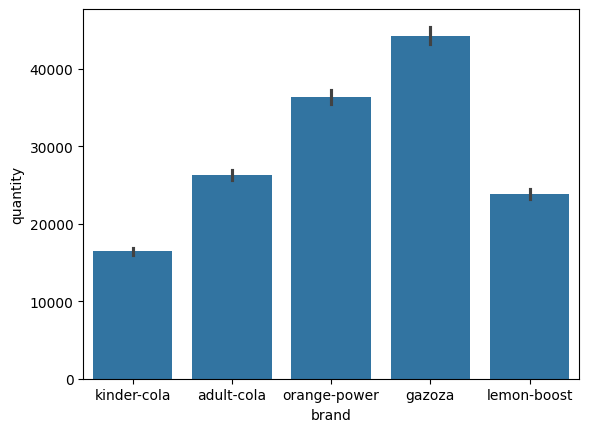

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.barplot(x="brand",y='quantity',data=df)

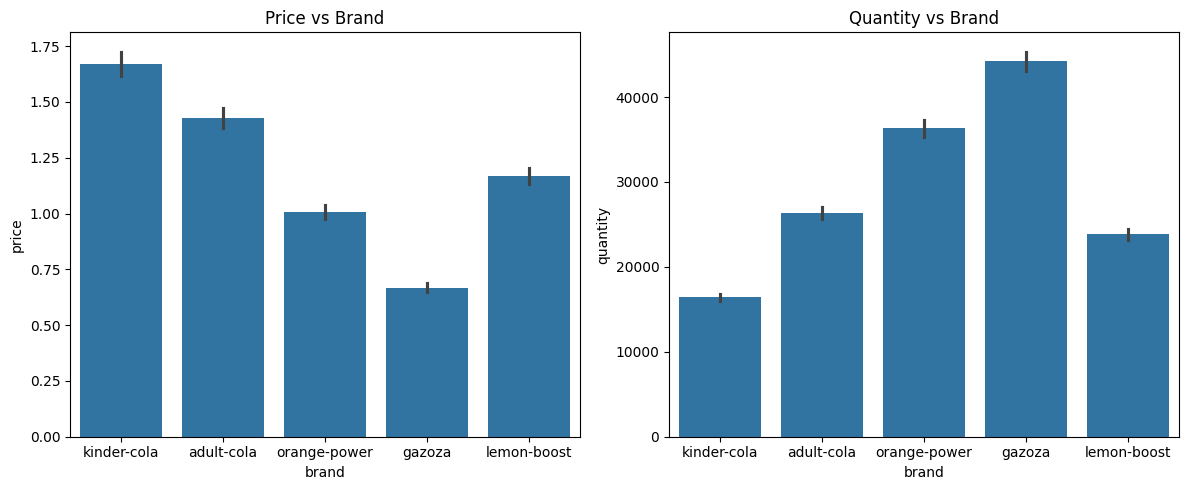

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(y='price', x='brand', data=df, ax=axs[0])
axs[0].set_title('Price vs Brand')

sns.barplot(y='quantity', x='brand', data=df, ax=axs[1])
axs[1].set_title('Quantity vs Brand')

plt.tight_layout()
plt.show()

In [16]:
# import thing here each and every brand has been equally distributed in the data so its fair to say that brand is playing a huge role in the price .

df.groupby('brand')['price'].size()

brand
adult-cola      1296
gazoza          1296
kinder-cola     1296
lemon-boost     1296
orange-power    1296
Name: price, dtype: int64

In [17]:
brand_mapping = {
    'kinder-cola': 0,
    'adult-cola': 1,
    'orange-power': 3,
    'gazoza': 4,
    'lemon-boost': 2
}
df['brand'] = df['brand'].map(brand_mapping)

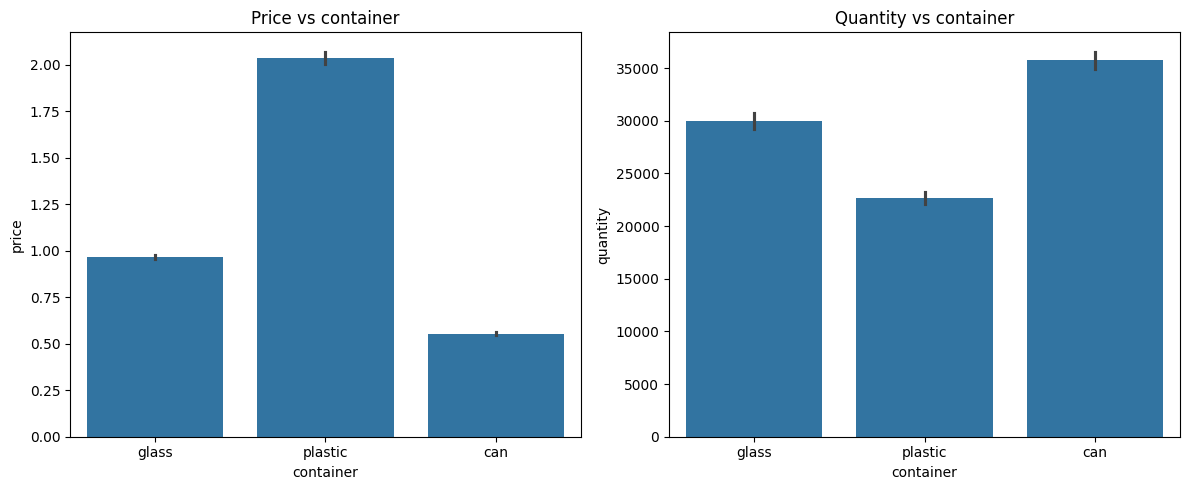

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(y='price', x='container', data=df, ax=axs[0])
axs[0].set_title('Price vs container')

sns.barplot(y='quantity', x='container', data=df, ax=axs[1])
axs[1].set_title('Quantity vs container')

plt.tight_layout()
plt.show()

In [19]:
df["capacity"].str.split("mlt")

0       l]
1       [1.5lt]
2       l]
3       l]
4       l]
         ...   
6475    [1.5lt]
6476    l]
6477    l]
6478    [1.5lt]
6479    l]
Name: capacity, Length: 6480, dtype: object

In [20]:
import re

def convert_lt_to_ml(volume):
    # Define a dictionary to map volume units to their multiplier
    unit_multipliers = {
        'lt': 1000,  # 1 liter = 1000 milliliters
        'ml': 1      # 1 milliliter = 1 milliliter
    }

    # Regular expression pattern to extract numeric value and unit from the string
    pattern = r'(\d+(\.\d+)?)\s*(lt|ml)'

    # Extract numeric value and unit using regular expression
    match = re.match(pattern, volume)
    if match:
        value = float(match.group(1))  # Extract numeric value
        unit = match.group(3)          # Extract unit

        # Convert to milliliters only if the unit is in liters ('lt')
        if unit == 'lt':
            value *= unit_multipliers[unit]

        return value  # Return volume
    else:
        return None  # Return None if the pattern doesn't match
df.loc[df['capacity'].str.contains('lt'), 'capacity'] = df.loc[df['capacity'].str.contains('lt'), 'capacity'].apply(convert_lt_to_ml)

In [21]:

def extract_numeric(text):
    if isinstance(text, str):
        pattern = r'(\d+(\.\d+)?)'
        match = re.search(pattern, text)
        if match:
            return match.group(1)
        else:
            return None
    else:
        return text

# Apply the function to 'Volume' column and store the extracted numeric part in a new column 'capacity'
df['capacity'] = df['capacity'].apply(extract_numeric)

In [22]:
encoded_columns = pd.get_dummies(df[['city', 'shop', 'container']], drop_first=True)
# Drop the original categorical columns
df.drop(['city', 'shop', 'container'], axis=1, inplace=True)
df = pd.concat([df, encoded_columns], axis=1)

In [23]:
df["capacity"]=df["capacity"].astype('int')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6480 entries, 0 to 6479
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   lat                6480 non-null   float64
 1   long               6480 non-null   float64
 2   pop                6480 non-null   float64
 3   brand              6480 non-null   int64  
 4   capacity           6480 non-null   int32  
 5   price              6480 non-null   float64
 6   quantity           6480 non-null   float64
 7   year               6480 non-null   int32  
 8   month              6480 non-null   int32  
 9   day                6480 non-null   int32  
 10  city_Irakleion     6480 non-null   bool   
 11  city_Larisa        6480 non-null   bool   
 12  city_Patra         6480 non-null   bool   
 13  city_Thessaloniki  6480 non-null   bool   
 14  shop_shop_2        6480 non-null   bool   
 15  shop_shop_3        6480 non-null   bool   
 16  shop_shop_4        6480 

In [25]:
X=df.drop(columns="price")
y=df["price"]

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# Creating Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)

# Training the model
rf_regressor.fit(X_train, y_train)

# Predicting on the test set
predictions = rf_regressor.predict(X_test)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, predictions)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, predictions, squared=False)

print(f"R-squared (R2): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


R-squared (R2): 0.9546523385961506
Mean Absolute Error (MAE): 0.10417384259259259
Mean Squared Error (MSE): 0.027869538788580245
Root Mean Squared Error (RMSE): 0.16694172273155758


In [28]:
import pandas as pd
from sklearn.model_selection import BaseCrossValidator

class GroupedTimeSeriesSplit(BaseCrossValidator):
    def __init__(self, n_splits=5):
        self.n_splits = n_splits

    def split(self, X, groups=None):
        day_col = 'day'  
        month_col = 'month' 
        year_col = 'year'  

        unique_years = X[year_col].unique()
        unique_years.sort()

        splits = []
        current_idx = 0

        for i in range(self.n_splits):
            train_end_idx = int(len(unique_years) * (i + 1) / self.n_splits)

            train_years = unique_years[current_idx:train_end_idx]
            test_years = unique_years[train_end_idx:train_end_idx + 1]

            train_indices = X[X[year_col].isin(train_years)].index.tolist()
            test_indices = X[X[year_col].isin(test_years)].index.tolist()

            yield train_indices, test_indices

            current_idx = train_end_idx

    def get_n_splits(self, X=None, y=None, groups=None):
        return self.n_splits
gts = GroupedTimeSeriesSplit(n_splits=5)

# Example of how to use the custom cross-validator
for train_index, test_index in gts.split(df):
    print("Train indices:", train_index)
    print("Test indices:", test_index)
    print()


Train indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming 'df' is your dataset and 'GroupedTimeSeriesSplit' is defined

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Perform nested time series cross-validation and train the model
n_splits = 5  # Number of splits for the nested cross-validation
mse_scores = []  # List to store MSE scores for each fold
r2_scores = []  # List to store R2 scores for each fold
mae_scores = []  # List to store MAE scores for each fold

for train_index, test_index in GroupedTimeSeriesSplit(n_splits=n_splits).split(df):
    train_data, test_data = df.iloc[train_index], df.iloc[test_index]

    # Split features and target for the current fold into train and test sets
    X_train, X_test = train_data.drop('price', axis=1), test_data.drop('price', axis=1)
    y_train, y_test = train_data['price'], test_data['price']

    # Further split the train set into train and validation sets using train_test_split
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Train the Random Forest Regressor on the train set
    rf.fit(X_train, y_train)

    # Predict on the validation set
    val_predictions = rf.predict(X_val)

    # Calculate evaluation metrics for this fold on the validation set
    mse = mean_squared_error(y_val, val_predictions)
    r2 = r2_score(y_val, val_predictions)
    mae = mean_absolute_error(y_val, val_predictions)

    # Append scores to lists
    mse_scores.append(mse)
    r2_scores.append(r2)
    mae_scores.append(mae)

avg_mse = np.mean(mse_scores)
avg_r2 = np.mean(r2_scores)
avg_mae = np.mean(mae_scores)

print(f"Average MSE across {n_splits} folds: {avg_mse}")
print(f"Average R-squared (R2) across {n_splits} folds: {avg_r2}")
print(f"Average MAE across {n_splits} folds: {avg_mae}")


Average MSE across 5 folds: 0.05172399143981482
Average R-squared (R2) across 5 folds: 0.9237279317105547
Average MAE across 5 folds: 0.14415856481481484
